In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import six
import joblib
import sys
sys.modules['sklearn.externals.six'] = six
sys.modules['sklearn.externals.joblib'] = joblib
!pip install mglearn
import mglearn

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

# PCA vs NMF vs T-SNE

## Run PCA on unscaled data

Text(0, 0.5, 'Second principal component')

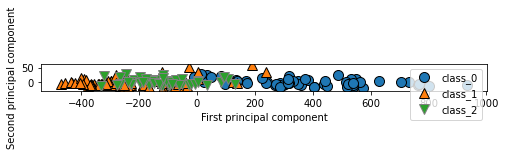

In [3]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca1 = PCA(n_components=2)
# fit PCA model to data
pca1.fit(wine.data)

# transform data onto the first two principal components
X_pca1 = pca1.transform(wine.data)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca1[:, 0], X_pca1[:, 1], wine.target)
plt.legend(wine.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0, 0.5, 'Principal components')

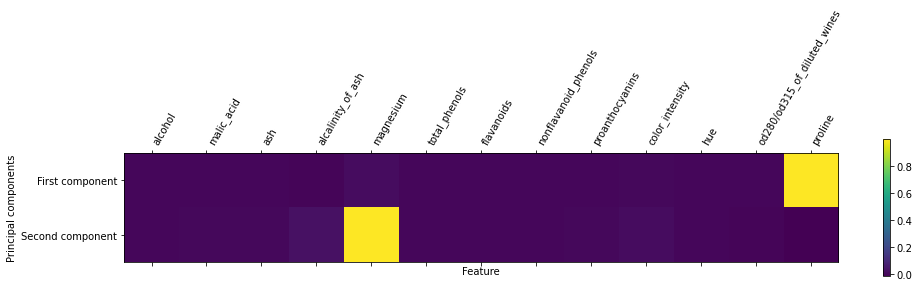

In [4]:
plt.matshow(pca1.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(wine.feature_names)),
           wine.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

## Scale data

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(wine.data)
X_scaled = scaler.transform(wine.data)

## Run PCA on scaled data

Text(0, 0.5, 'Second principal component')

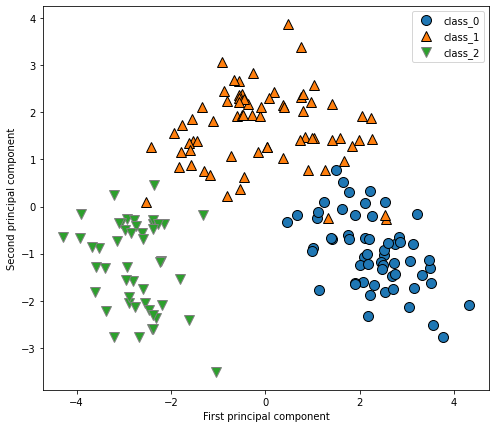

In [6]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca2 = PCA(n_components=2)
# fit PCA model to data
pca2.fit(X_scaled)

# transform data onto the first two principal components
X_pca2 = pca2.transform(X_scaled)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca2[:, 0], X_pca2[:, 1], wine.target)
plt.legend(wine.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0, 0.5, 'Principal components')

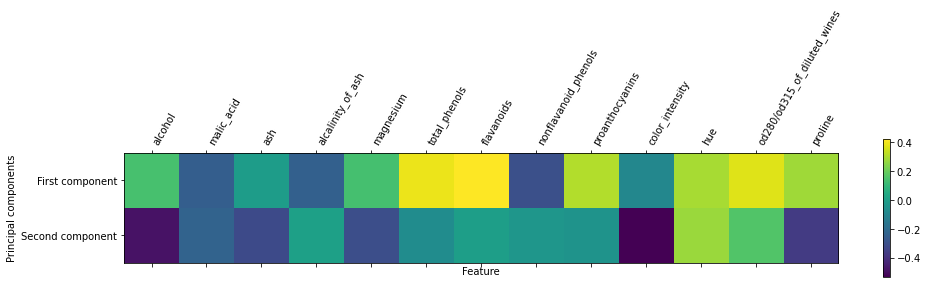

In [7]:
plt.matshow(pca2.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(wine.feature_names)),
           wine.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

## Run NMF on unscaled data

Text(0, 0.5, 'Second basis component')

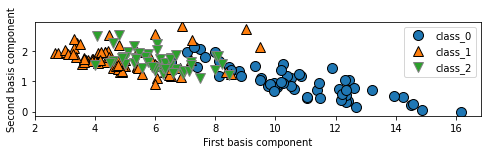

In [26]:
from sklearn.decomposition import NMF
# keep the first two principal components of the data
nmf = NMF(n_components=2, random_state=0)
# fit NMF model to data
nmf.fit(abs(wine.data))
    
# transform data onto the first two principal components
X_nmf = nmf.transform(abs(wine.data))

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_nmf[:, 0], X_nmf[:, 1], wine.target)
plt.legend(wine.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First basis component")
plt.ylabel("Second basis component")

## Run NMF on scaled data

Text(0, 0.5, 'Second basis component')

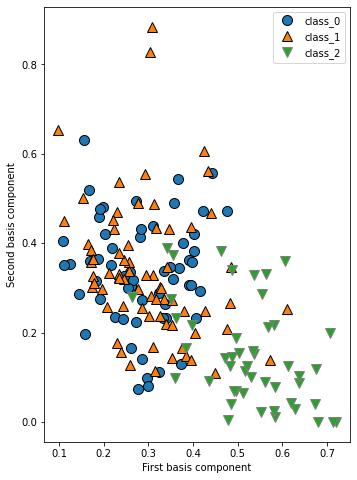

In [28]:
from sklearn.decomposition import NMF
# keep the first two principal components of the data
nmf1 = NMF(n_components=2, random_state=0)
# fit NMF model to data
nmf1.fit(abs(X_scaled))
    
# transform data onto the first two principal components
X_nmf1 = nmf.transform(abs(X_scaled))

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_nmf1[:, 0], X_nmf1[:, 1], wine.target)
plt.legend(wine.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First basis component")
plt.ylabel("Second basis component")

## Run T-SNE on unscaled data

Text(0, 0.5, 'Second basis component')

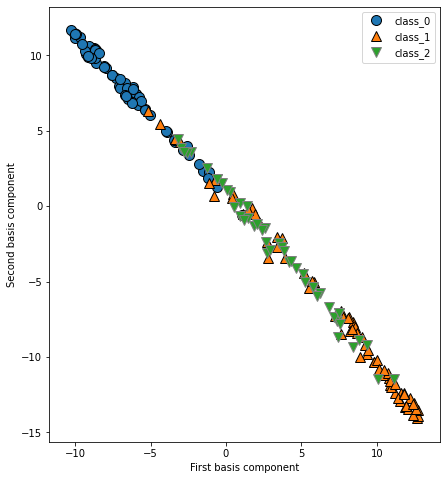

In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(wine.data)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_tsne[:, 0], X_tsne[:, 1], wine.target)
plt.legend(wine.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First basis component")
plt.ylabel("Second basis component")

## Run t-SNE on scaled data

Text(0, 0.5, 'Second basis component')

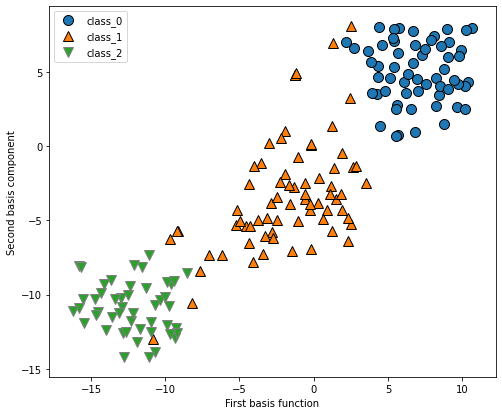

In [11]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_tsne[:, 0], X_tsne[:, 1], wine.target)
plt.legend(wine.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First basis function")
plt.ylabel("Second basis component")

# Dimensionality Reduction with PCA

## Explained Variance in PCA

In [12]:
# keep all the principal components of the data
pca3 = PCA()
# fit PCA model to data
pca3.fit(X_scaled)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca3.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


In [13]:
# keep the first two principal components of the data
pca4 = PCA(n_components=0.95)
# fit PCA model to data
pca4.fit(X_scaled)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca4.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019]


## PCA as a pre-processing step for classification

In [14]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

data2 = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(data2.data)
X2_scaled = scaler.transform(data2.data)

### No Pre-Processing

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(X2_scaled, data2.target):
    X2_train = X2_scaled[train_index]
    X2_test = X2_scaled[test_index]
    y2_train = data2.target[train_index]
    y2_test = data2.target[test_index]
    
#model=LogisticRegression().fit(X2_train, y2_train)
#model = SVC(kernel='poly', C=10).fit(X_train, y_train)
model = DecisionTreeClassifier(random_state=0).fit(X2_train, y2_train)

print("Accuracy on training set: {:.2f}".format(model.score(X2_train, y2_train)))
print("Accuracy on test set: {:.2f}".format(model.score(X2_test, y2_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.91


### Two Principal Components

In [16]:
# keep the first two principal components of the data
pca2 = PCA(n_components=2)
# fit PCA model to data
pca2.fit(X2_scaled)
# transform data onto the first two principal components
X2_pca2 = pca2.transform(X2_scaled)

for train_index, test_index in split.split(X2_scaled, data2.target):
    X2_train = X2_pca2[train_index]
    X2_test = X2_pca2[test_index]
    y2_train = data2.target[train_index]
    y2_test = data2.target[test_index]

#model=LogisticRegression().fit(X2_train, y2_train)
model = DecisionTreeClassifier(random_state=0).fit(X2_train, y2_train)

print("Accuracy on training set: {:.2f}".format(model.score(X2_train, y2_train)))
print("Accuracy on test set: {:.2f}".format(model.score(X2_test, y2_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.92


### 95% of Variance Explained

In [17]:
# keep the first two principal components of the data
pca4 = PCA(n_components=0.95)
# fit PCA model to data
pca4.fit(X2_scaled)
# transform data onto the first ten principal components
X2_pca4 = pca4.transform(X2_scaled)

for train_index, test_index in split.split(X2_scaled, data2.target):
    X2_train = X2_pca4[train_index]
    X2_test = X2_pca4[test_index]
    y2_train = data2.target[train_index]
    y2_test = data2.target[test_index]
    
#model=LogisticRegression().fit(X2_train, y2_train)
model = DecisionTreeClassifier(random_state=0).fit(X2_train, y2_train)

print("Accuracy on training set: {:.2f}".format(model.score(X2_train, y2_train)))
print("Accuracy on test set: {:.2f}".format(model.score(X2_test, y2_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.93


## PCA as a pre-processing step for regression

In [18]:
from sklearn.datasets import load_diabetes
#from sklearn.datasets import load_boston

data3 = load_diabetes()

scaler = StandardScaler()
scaler.fit(data3.data)
#X = scaler.transform(data3.data)
X3 = data3.data

### No Pre-Processing

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import ShuffleSplit

split = ShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(X3, data3.target):
    X3_train = X3[train_index]
    X3_test = X3[test_index]
    y3_train = data3.target[train_index]
    y3_test = data3.target[test_index]
    
#model=LinearRegression().fit(X_train, y_train)
model=KNeighborsRegressor().fit(X3_train, y3_train)

print("Training set R^2: {:.2f}".format(model.score(X3_train, y3_train)))
print("Test set R^2: {:.2f}".format(model.score(X3_test, y3_test)))

Training set R^2: 0.58
Test set R^2: 0.43


### Two Principal Components

In [20]:
# keep the first two principal components of the data
pcaReg = PCA(2)
# fit PCA model to data
pcaReg.fit(X3)
# transform data onto the first two principal components
X3_pca4 = pcaReg.transform(X3)

for train_index, test_index in split.split(X3_pca4, data3.target):
    X3_train = X3_pca4[train_index]
    X3_test = X3_pca4[test_index]
    y3_train = data3.target[train_index]
    y3_test = data3.target[test_index]
    
model=KNeighborsRegressor().fit(X3_train, y3_train)

print("Training set R^2: {:.2f}".format(model.score(X3_train, y3_train)))
print("Test set R^2: {:.2f}".format(model.score(X3_test, y3_test)))

Training set R^2: 0.46
Test set R^2: 0.16


### 95% of Variance Explained

In [21]:
# keep the first two principal components of the data
pcaReg = PCA(n_components=0.95)
# fit PCA model to data
pcaReg.fit(X3)
# transform data onto the principal components covering 95% of the variance
X3_pca4 = pcaReg.transform(X3)

for train_index, test_index in split.split(X3_pca4, data3.target):
    X3_train = X3_pca4[train_index]
    X3_test = X3_pca4[test_index]
    y3_train = data3.target[train_index]
    y3_test = data3.target[test_index]
    
model=KNeighborsRegressor().fit(X3_train, y3_train)

print("Training set R^2: {:.2f}".format(model.score(X3_train, y3_train)))
print("Test set R^2: {:.2f}".format(model.score(X3_test, y3_test)))

Training set R^2: 0.58
Test set R^2: 0.43


# Visualization with t-SNE

## Works Well for Classification

Text(0, 0.5, 'Second basis component')

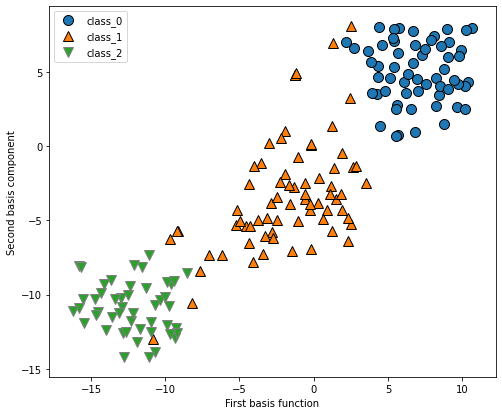

In [22]:
from sklearn.datasets import load_wine
wine = load_wine()

scaler = StandardScaler()
scaler.fit(wine.data)

X4_scaled = scaler.transform(wine.data)

tsne = TSNE(random_state=42)
X4_tsne = tsne.fit_transform(X4_scaled)

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_tsne[:, 0], X4_tsne[:, 1], wine.target)
plt.legend(wine.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First basis function")
plt.ylabel("Second basis component")

Text(0, 0.5, 'Second basis component')

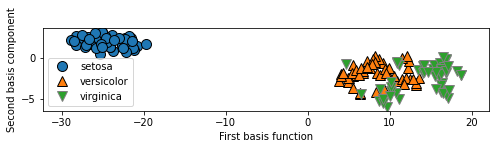

In [23]:
from sklearn.datasets import load_iris

iris = load_iris()

scaler = StandardScaler()
scaler.fit(iris.data)
X5_scaled = scaler.transform(iris.data)

tsne = TSNE(random_state=42)
X5_tsne = tsne.fit_transform(X5_scaled)

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X5_tsne[:, 0], X5_tsne[:, 1], iris.target)
plt.legend(iris.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First basis function")
plt.ylabel("Second basis component")

Text(0, 0.5, 'Second basis component')

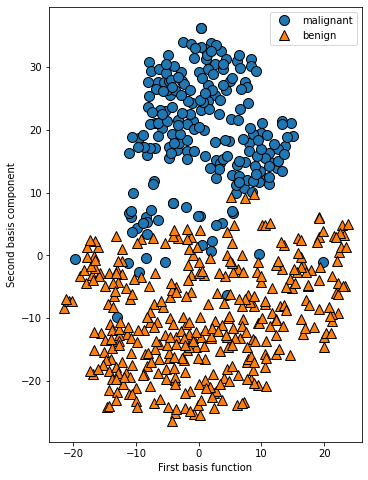

In [24]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X6_scaled = scaler.transform(cancer.data)

tsne = TSNE(random_state=42)
X6_tsne = tsne.fit_transform(X6_scaled)

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X6_tsne[:, 0], X6_tsne[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First basis function")
plt.ylabel("Second basis component")

## Does not work well for Regression

IndexError: list index out of range

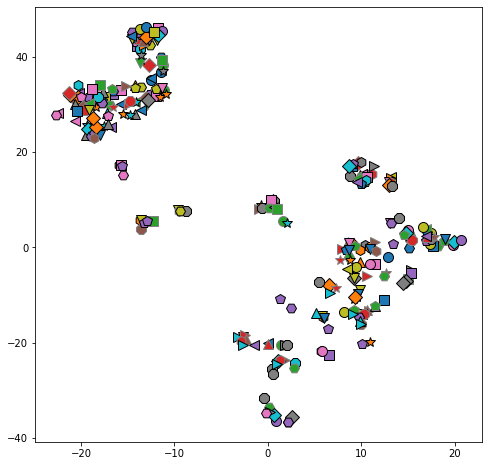

In [25]:
from sklearn.datasets import load_boston
import seaborn as sns

boston = load_boston()

scaler = StandardScaler()
scaler.fit(boston.data)
X7_scaled = scaler.transform(boston.data)

X7_tsne = tsne.fit_transform(X7_scaled)

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X7_tsne[:, 0], X7_tsne[:, 1], boston.target)
plt.legend(boston.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First basis function")
plt.ylabel("Second basis component")

### Although it may be useful if you categorize the continous output first

In [ ]:
from sklearn.datasets import load_boston
import seaborn as sns

boston = load_boston()

scaler = StandardScaler()
scaler.fit(boston.data)
X_scaled = scaler.transform(boston.data)

X_tsne = tsne.fit_transform(X_scaled)
y_rounded = np.round(boston.target/5)*5

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_tsne[:, 0], X_tsne[:, 1], y_rounded)
plt.gca().set_aspect("equal")
plt.xlabel("First basis function")
plt.ylabel("Second basis component")